In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [7]:
df.shape

(3000, 10)

In [8]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [9]:
df['Agency_Code'].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [10]:
df['Type'].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [11]:
df['Claimed'].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [12]:
df['Channel'].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [13]:
df['Product Name'].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

In [14]:
df['Destination'].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

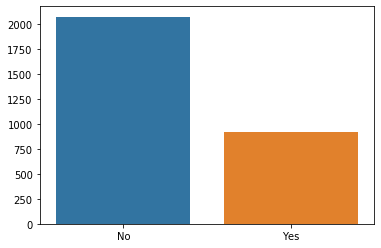

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

In [15]:
sns.barplot(df.Claimed.value_counts().index,df.Claimed.value_counts().values)
plt.show()
df['Claimed'].value_counts(normalize=True)

In [16]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


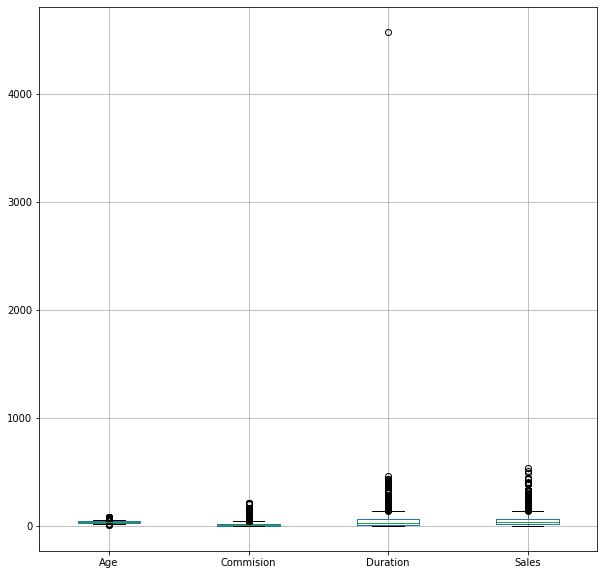

In [17]:
fig=plt.figure(figsize=(10,10))
df.boxplot(column=['Age', 'Commision', 'Duration','Sales']);

## Univariate & Multivariate Analysis

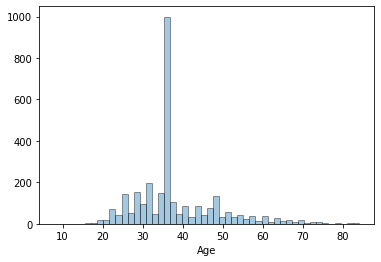

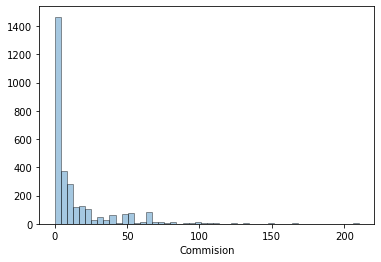

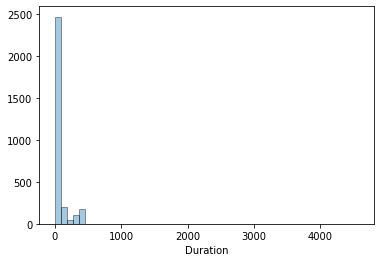

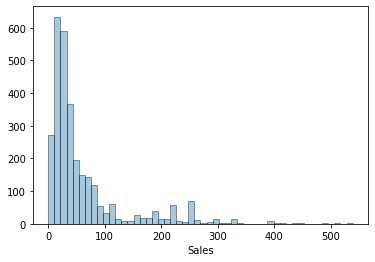

In [18]:
sns.distplot(df['Age'], bins = 50, hist_kws= dict(ec ='black'),kde=False)
plt.show()

sns.distplot(df['Commision'], bins = 50, hist_kws= dict(ec ='black'),kde=False)
plt.show()

sns.distplot(df['Duration'], bins = 50, hist_kws= dict(ec ='black'),kde=False)
plt.show()

sns.distplot(df['Sales'], bins = 50, hist_kws= dict(ec ='black'),kde=False)
plt.show()

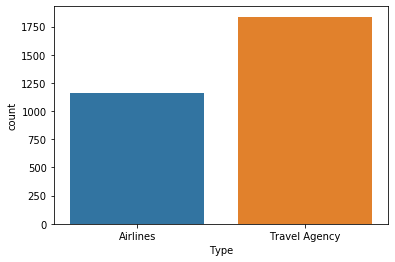

In [19]:
sns.countplot(x="Type", data=df);

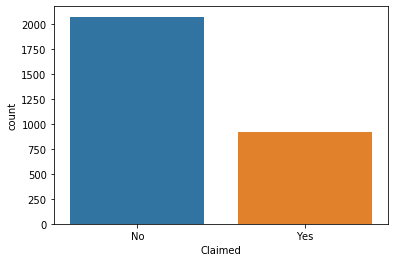

In [20]:

sns.countplot(x="Claimed", data=df);

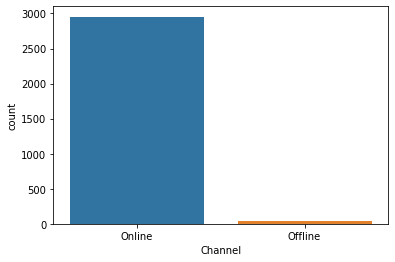

In [21]:
sns.countplot(x="Channel", data=df);

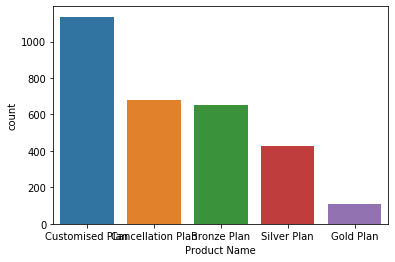

In [22]:
sns.countplot(x="Product Name", data=df);

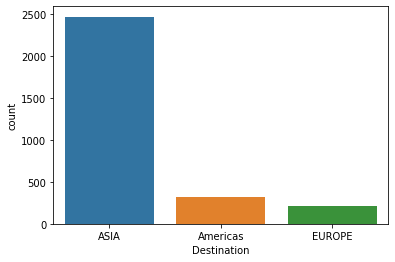

In [23]:
sns.countplot(x="Destination", data=df);

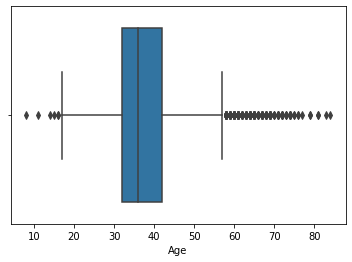

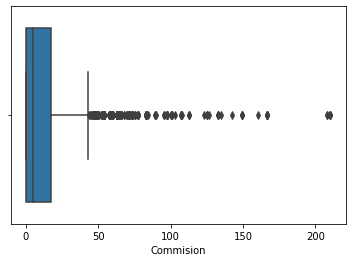

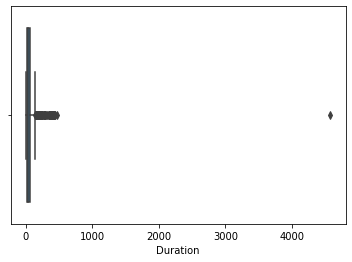

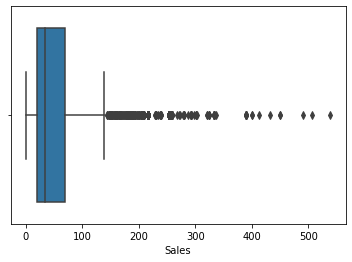

In [24]:
sns.boxplot(x=df['Age'])
plt.show()

sns.boxplot(x=df['Commision'])
plt.show()

sns.boxplot(x=df['Duration'])
plt.show()

sns.boxplot(x=df['Sales'])
plt.show()

In [25]:
def treat_outlier(col):
 sorted(col)
 Q1,Q3=np.percentile(col,[25,75])
 IQR=Q3-Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range, upper_range

In [26]:
for feature in df[['Age', 'Commision', 'Duration', 'Sales']]:
 lr,ur=treat_outlier(df[feature])
 df[feature]=np.where(df[feature]>ur,ur,df[feature])
 df[feature]=np.where(df[feature]<lr,lr,df[feature])

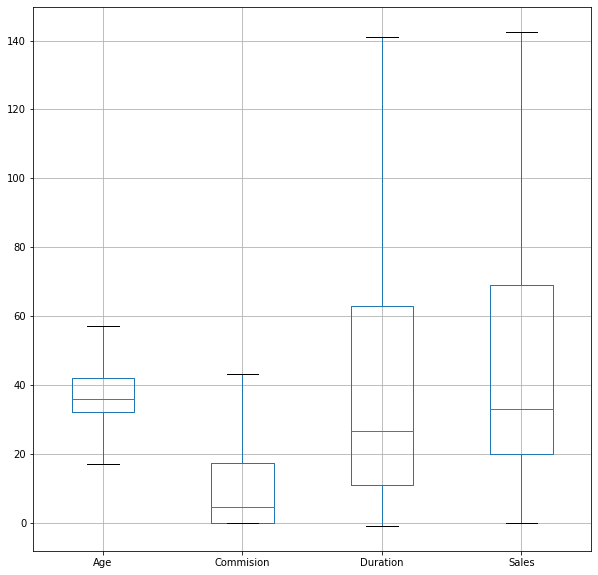

In [27]:
fig=plt.figure(figsize=(10,10))
df.boxplot(column=['Age', 'Commision', 'Duration','Sales']);

In [28]:
#sns.pairplot(df)

In [29]:
df.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.070513,0.013557,0.021783
Commision,0.070513,1.000000,0.458139,0.686219
Duration,0.013557,0.458139,1.000000,0.542815
Sales,0.021783,0.686219,0.542815,1.000000


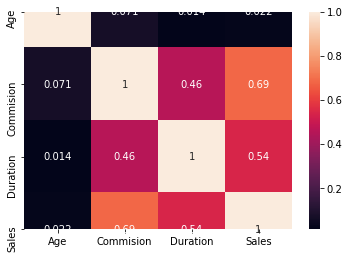

In [30]:
sns.heatmap(df.corr(),annot=True);

## Converting categorical variables to int

In [31]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [32]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null float64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null float64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(4), int8(6)
memory usage: 111.5 KB


## Splitting train and test data

In [34]:
X = df.drop("Claimed", axis=1)
y = df.pop("Claimed")

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [36]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


## CART Model

In [37]:
param_grid = {
'criterion': ['gini'],
'max_depth': [4,5,6],
'min_samples_leaf': [30,35, 40],
'min_samples_split': [75, 90, 105],
}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [38]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 75}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=75,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [39]:
from sklearn import tree
train_char_label = ['no', 'yes']
tree_regularized = open('d:/tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , 
                                feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [40]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.609996
Sales         0.252758
Product Name  0.077916
Commision     0.022955
Duration      0.022666
Type          0.007547
Age           0.006162
Channel       0.000000
Destination   0.000000


In [41]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [42]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.432432,0.567568
2,0.432432,0.567568
3,0.184834,0.815166
4,0.937143,0.062857


AUC: 0.827


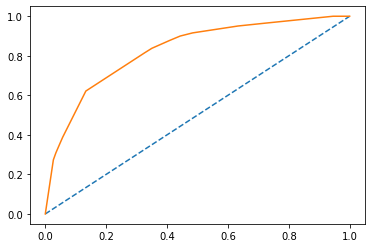

In [43]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.790


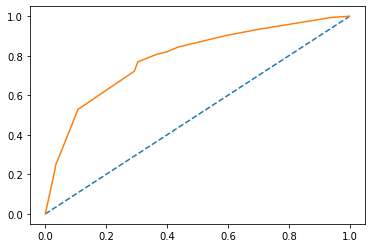

In [44]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [45]:
confusion_matrix(train_labels, ytrain_predict)

array([[1275,  196],
       [ 238,  391]], dtype=int64)

In [46]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7933333333333333

In [47]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1471
           1       0.67      0.62      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100



In [48]:
confusion_matrix(test_labels, ytest_predict)

array([[540,  65],
       [139, 156]], dtype=int64)

In [49]:
#Train Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels) 
cart_test_acc

0.7733333333333333

In [50]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       605
           1       0.71      0.53      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



In [51]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.62
cart_train_f1  0.64


In [52]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.53
cart_test_f1  0.6


# Building a Random Forest Classifier

In [58]:
param_grid = {
    'max_depth': [4,5,6],## 20,30,40
    'max_features': [5,6,7],## 7,8,9
    'min_samples_leaf': [10,20,35],## 50,100
    'min_samples_split': [30,60,75], ## 60,70
    'n_estimators': [100,200] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [59]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [60]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 200}

In [61]:
best_grid = grid_search.best_estimator_

In [62]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [63]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [64]:
confusion_matrix(train_labels,ytrain_predict)

array([[1311,  160],
       [ 241,  388]], dtype=int64)

In [65]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.809047619047619

In [66]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1471
           1       0.71      0.62      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.81      2100



In [67]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.62
rf_train_f1  0.66


Area under Curve is 0.8558576571532943


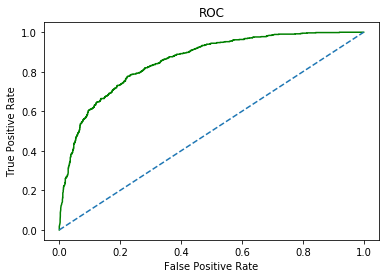

In [68]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [69]:
confusion_matrix(test_labels,ytest_predict)

array([[549,  56],
       [151, 144]], dtype=int64)

In [70]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.77

In [71]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.49      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [72]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.72
rf_test_recall  0.49
rf_test_f1  0.58


Area under Curve is 0.8195629640005603


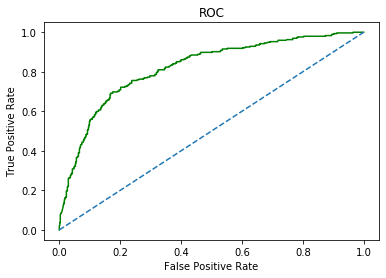

In [73]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [74]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.434053
Sales         0.191694
Product Name  0.177056
Commision     0.078527
Duration      0.057171
Age           0.047433
Type          0.010081
Destination   0.003608
Channel       0.000376


# Artificial Neural Network Model:

In [75]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc=StandardScaler()
X_trains =sc.fit_transform(X_train)
X_tests=sc.transform(X_test)

In [79]:
param_grid = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [1000,2000], #5000,2500
    'solver': ['sgd','adam'], #sgd
    'tol': [0.01,0.01], 
    'activation':['relu']
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [80]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'max_iter': 1000,
 'solver': 'adam',
 'tol': 0.01}

In [81]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.01,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [82]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [83]:
confusion_matrix(train_labels,ytrain_predict)

array([[1357,  114],
       [ 361,  268]], dtype=int64)

In [84]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7738095238095238

In [85]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1471
           1       0.70      0.43      0.53       629

    accuracy                           0.77      2100
   macro avg       0.75      0.67      0.69      2100
weighted avg       0.76      0.77      0.75      2100



In [86]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.7
nn_train_recall  0.43
nn_train_f1  0.53


Area under Curve is 0.80907724215598


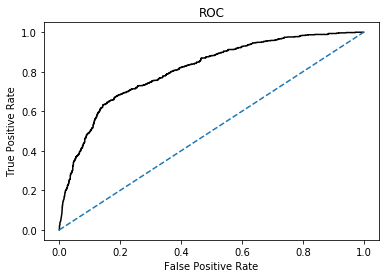

In [87]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [88]:
confusion_matrix(test_labels,ytest_predict)

array([[566,  39],
       [183, 112]], dtype=int64)

In [89]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7533333333333333

In [90]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       605
           1       0.74      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.75      0.66      0.67       900
weighted avg       0.75      0.75      0.73       900



In [91]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.74
nn_test_recall  0.38
nn_test_f1  0.5


Area under Curve is 0.7795293458467571


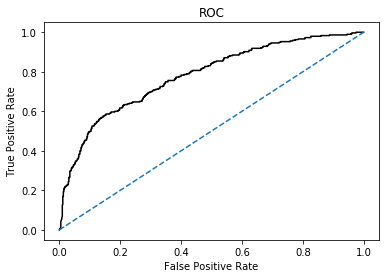

In [92]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

## Comparing three models

In [93]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.81,0.77,0.77,0.75
AUC,0.83,0.79,0.86,0.82,0.81,0.78
Recall,0.62,0.53,0.62,0.49,0.43,0.38
Precision,0.67,0.71,0.71,0.72,0.70,0.74
F1 Score,0.64,0.60,0.66,0.58,0.53,0.50


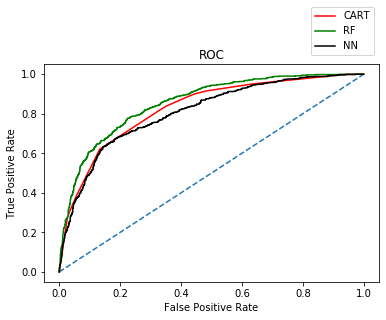

In [94]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

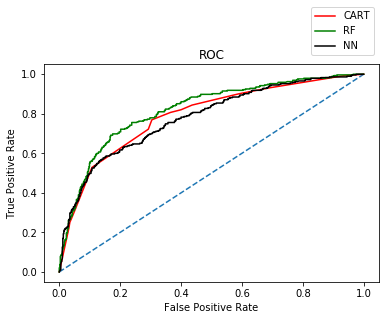

In [95]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')